<a href="https://colab.research.google.com/github/patuh-istizhar/submission-akhir-BMLP/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Patuh_Rujhan_Al_Istizhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**

1. **Sumber Dataset**:  
   [Bank Transaction Dataset for Fraud Detection](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection)
   
2. **Ketentuan Dataset**:
   - **Jumlah Baris**: 2512 baris.
   - **Tipe Data**:
     - *Kategorikal*: TransactionID, AccountID, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerOccupation, PreviousTransactionDate.
     - *Numerikal*: TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance.

# **2. Import Library**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler

# **3. Memuat Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laskar Ai/BMLP/bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

In [ ]:
# Menampilkan informasi jumlah baris, kolom, dan tipe data dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
# Ubah Tipe Data TransactionDate & PreviousTransactionDate menjadi datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Menghapus Kolom yang Tidak Relevan
df = df.drop(["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID"], axis=1)

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
# Identifikasi dan analisis data yang hilang (missing values)
print('Jumlah missing values:')
print(df.isnull().sum())

Jumlah missing values:
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [ ]:
# Identifikasi Kolom Duplikat
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 0


In [ ]:
# Analisis Statistik Deskriptif
df.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN


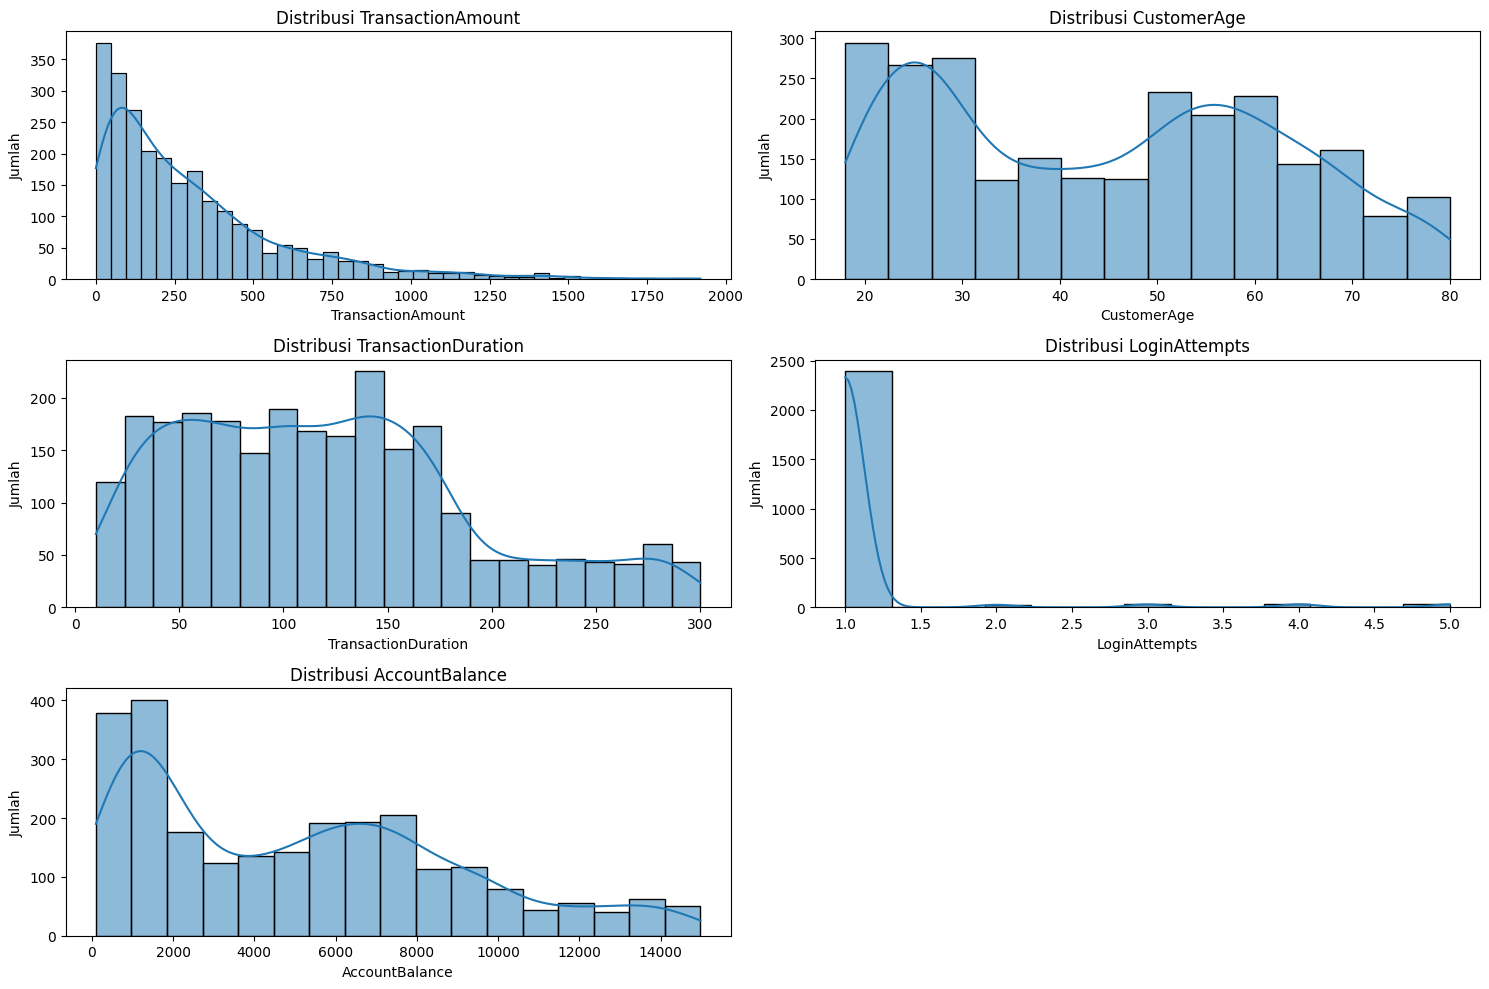

In [ ]:
# Visualisasi Distribusi Data Numerik dengan Histogram
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribusi {col}")
    plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()


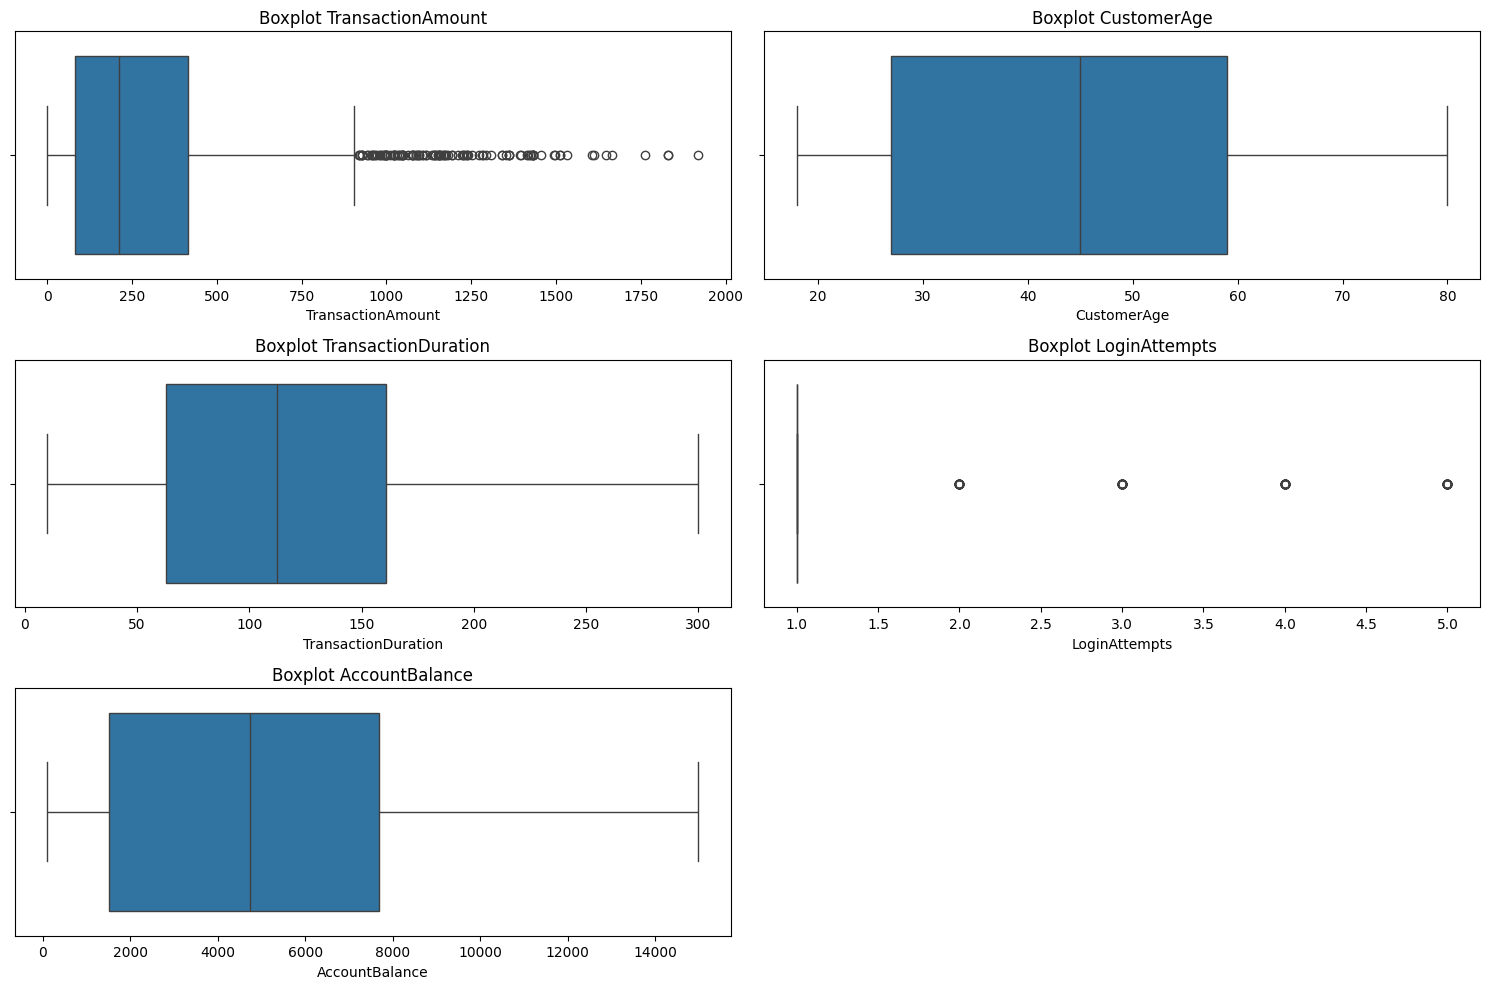

In [ ]:
# Visualisasi Data Numerik dengan Boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()

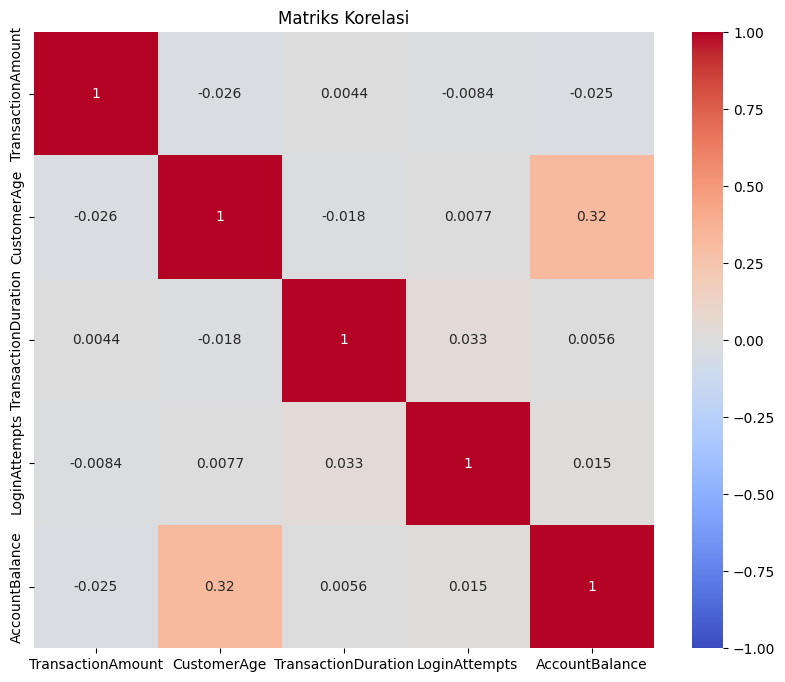

In [ ]:
# Visualisasi Matriks Korelasi dengan Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Matriks Korelasi")
plt.show()

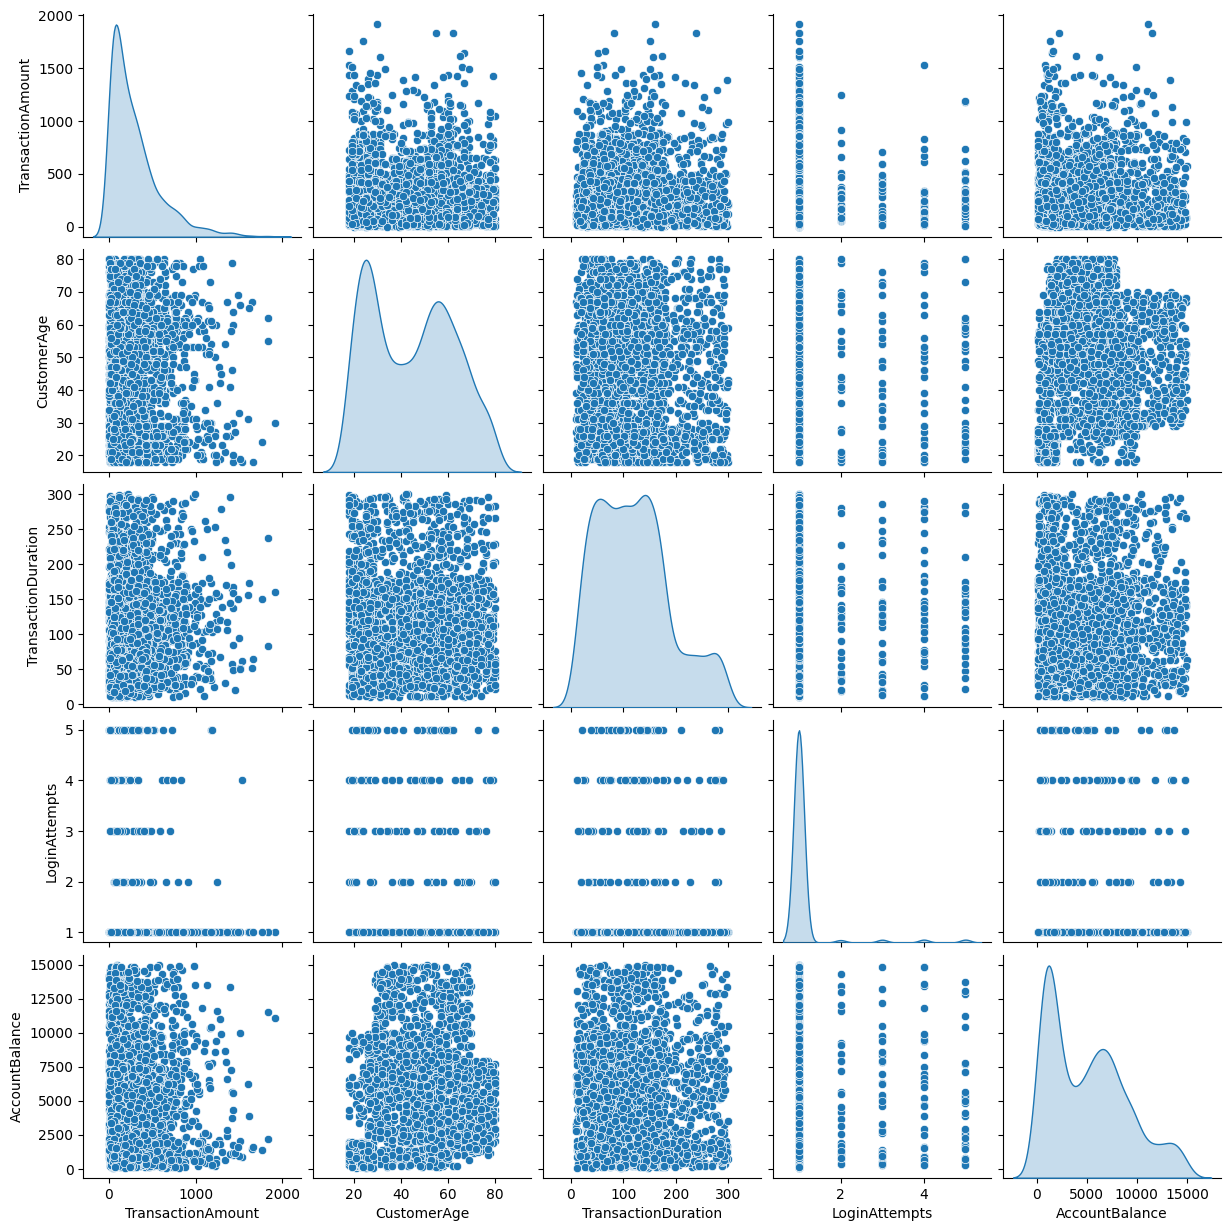

In [ ]:
# Visualisasi dengan Pairplot
sns.pairplot(df[numeric_cols], diag_kind="kde")
plt.show()

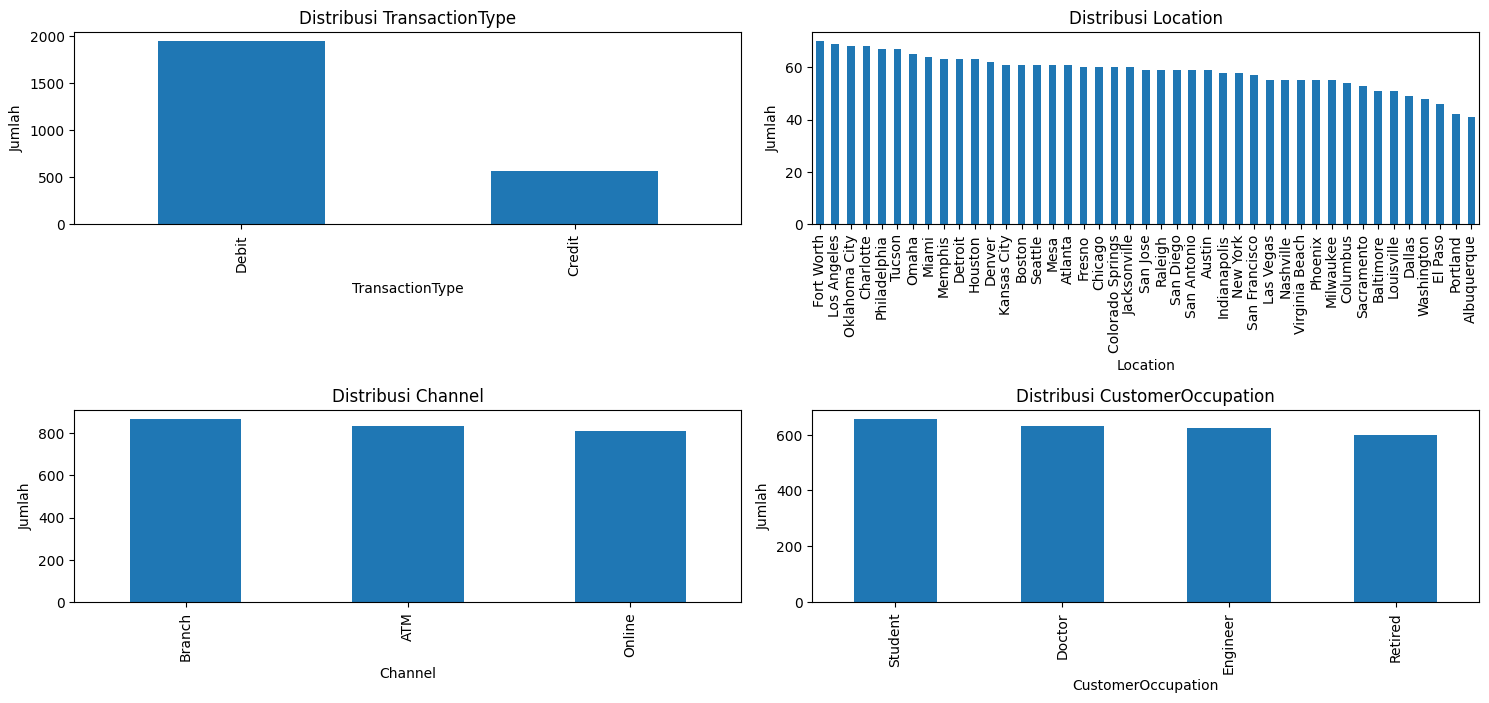

In [ ]:
# Visualisasi Data Categorial
categorical_cols = df.select_dtypes(include=["object"]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

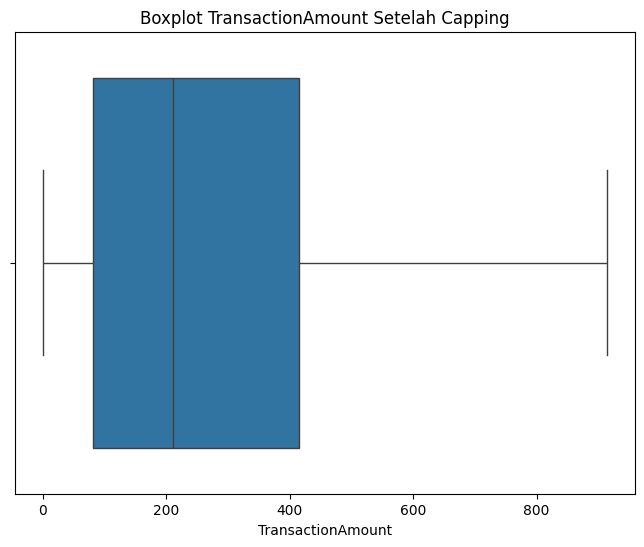

In [ ]:
# Capping Data Outlier
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

df = cap_outliers(df, "TransactionAmount")

# Tampilkan Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["TransactionAmount"])
plt.title("Boxplot TransactionAmount Setelah Capping")
plt.show()

In [ ]:
# Menambahkan Fitur
# 1. Basic time feature
df["Hour"] = df["TransactionDate"].dt.hour

# 2. Simple transaction features
df["AmountToBalanceRatio"] = df["TransactionAmount"] / (
    df["AccountBalance"] + 1
)  # Adding 1 to avoid division by zero
df["TransactionEfficiency"] = df["TransactionAmount"] / (df["TransactionDuration"] + 1)

In [ ]:
# 2. Mengambil kolom relevan untuk analisis
features = [
    "TransactionAmount",
    "AccountBalance",
    "TransactionDuration",
    "Hour",
    "AmountToBalanceRatio",
    "TransactionEfficiency",
]

X = df[features]
X.head()

,TransactionAmount,AccountBalance,TransactionDuration,Hour,AmountToBalanceRatio,TransactionEfficiency
0,14.09,5112.21,81,16,0.002756,0.171829
1,376.24,13758.91,141,16,0.027343,2.649577
2,126.29,1122.35,56,18,0.112423,2.215614
3,184.50,8569.06,25,16,0.021528,7.096154
4,13.45,7429.40,198,17,0.001810,0.067588


In [ ]:
# Standarisasi Nilai dengan RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,TransactionAmount,AccountBalance,TransactionDuration,Hour,AmountToBalanceRatio,TransactionEfficiency
0,-0.592378,0.061009,-0.321429,0.0,-0.384483,-0.457185
1,0.496329,1.461410,0.290816,0.0,-0.191986,0.184160
2,-0.255079,-0.585179,-0.576531,2.0,0.474102,0.071832
3,-0.080086,0.620873,-0.892857,0.0,-0.237510,1.335122
4,-0.594302,0.436296,0.872449,1.0,-0.391885,-0.484168


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

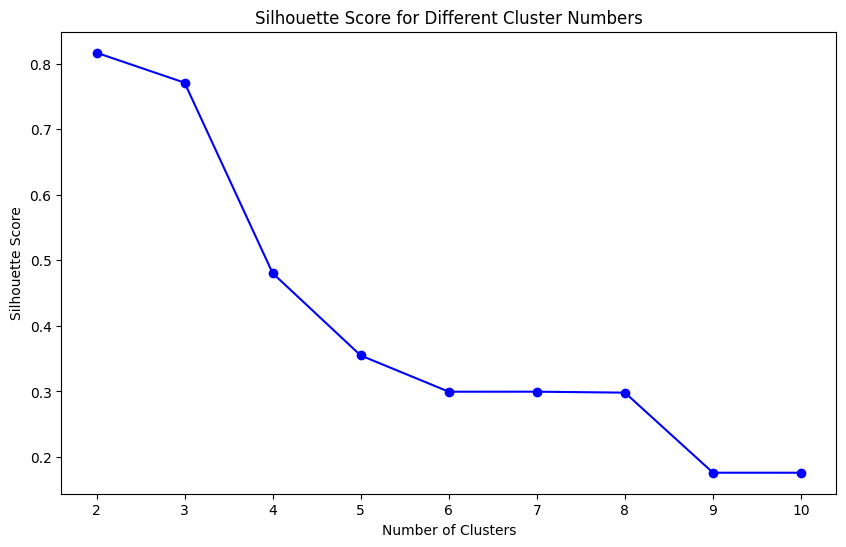

In [ ]:
# Mencari cluster dengan Silhouette Score terbaik (> 0.7)

cluster_numbers = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_numbers:
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(cluster_numbers, silhouette_scores, "bo-")
plt.title("Silhouette Score for Different Cluster Numbers")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X_scaled)

## **b. Evaluasi Model Clustering**

In [ ]:
# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}" )

Silhouette Score: 0.771


## **c. Feature Selection**

In [ ]:
# Feature Extraction dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Modeling dengan X_pca
clustering_with_pca = AgglomerativeClustering(n_clusters=3)
labels_with_pca = clustering_with_pca.fit_predict(X_pca)

# Silhouette Score
silhouette_avg_selected = silhouette_score(X_pca, labels_with_pca)
print(f"Silhouette Score: {silhouette_avg_selected:.3f}" )


Silhouette Score: 0.777


In [ ]:
print(f"Silhouette Score (sebelum feature selection): {silhouette_avg:.3f}")
print(f"Silhouette Score (setelah feature selection): {silhouette_avg_selected:.3f}")

Silhouette Score (sebelum feature selection): 0.771
Silhouette Score (setelah feature selection): 0.777


## **d. Visualisasi Hasil Clustering**

<ipython-input-22-0a482c9bb36b>:5: RuntimeWarning: Mean of empty slice.
  centroid = cluster_points.mean(axis=0)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


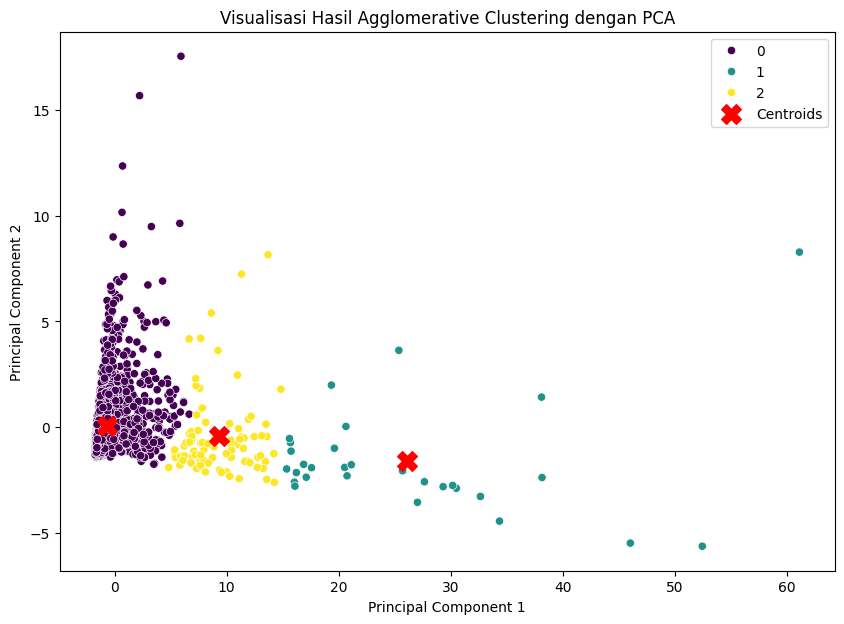

In [ ]:
# Hitung centroid
centroids = []
for cluster in range(n_clusters):
    cluster_points = X_pca[labels_with_pca == cluster]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

# Plot scatter plot dengan centroid
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_with_pca, palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Visualisasi Hasil Agglomerative Clustering dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [ ]:
# Menambahkan Label ke DataFrame yang Dinormalisasi
X_scaled['Cluster'] = labels

# Inverse Transform Label yang Dinormalisasi
features_to_inverse = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'Hour', 'AmountToBalanceRatio', 'TransactionEfficiency']
X_scaled[features_to_inverse] = scaler.inverse_transform(X_scaled[features_to_inverse])

# Tambahkan Data yang sudah Diinverse ke dalam DataFrame Asli
df[features_to_inverse + ['Cluster']] = X_scaled[features_to_inverse + ['Cluster']]

df

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Hour,AmountToBalanceRatio,TransactionEfficiency,Cluster
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81.0,1,5112.21,2024-11-04 08:08:08,16.0,0.002756,0.171829,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141.0,1,13758.91,2024-11-04 08:09:35,16.0,0.027343,2.649577,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56.0,1,1122.35,2024-11-04 08:07:04,18.0,0.112423,2.215614,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25.0,1,8569.06,2024-11-04 08:09:06,16.0,0.021528,7.096154,0
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198.0,1,7429.40,2024-11-04 08:06:39,17.0,0.001810,0.067588,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,Branch,33,Doctor,109.0,1,12690.79,2024-11-04 08:11:29,17.0,0.067462,7.783727,0
2508,251.54,2023-03-22 17:36:48,Debit,Tucson,Branch,48,Doctor,177.0,1,254.75,2024-11-04 08:11:42,17.0,0.983539,1.413146,0
2509,28.63,2023-08-21 17:08:50,Debit,San Diego,Branch,56,Retired,146.0,1,3382.91,2024-11-04 08:08:39,17.0,0.008461,0.194762,0
2510,185.97,2023-02-24 16:24:46,Debit,Denver,Online,23,Student,19.0,1,1776.91,2024-11-04 08:12:22,16.0,0.104600,9.298500,0


### Agregasi Data

In [ ]:
# Fitur yang diinterpretasi
features_to_interpret = {
    'numeric': ['TransactionAmount', 'AccountBalance', 'AmountToBalanceRatio'],
    'categorical': ['Channel', 'TransactionType']
}

# Loop melalui setiap cluster
print("# Interpretasi hasil clustering")
for cluster_id in df['Cluster'].unique():
    print(f"\nInterpretasi Cluster {cluster_id}:")
    cluster_data = df[df['Cluster'] == cluster_id]

    # Interpretasi fitur numerik
    for feature in features_to_interpret['numeric']:
        avg_value = cluster_data[feature].mean()
        print(f"- Rata-rata {feature}: {avg_value:.2f}")

    # Interpretasi fitur kategorikal
    for feature in features_to_interpret['categorical']:
        dominant_value = cluster_data[feature].mode()[0]
        print(f"- {feature} dominan: {dominant_value}")

# Interpretasi hasil clustering

Interpretasi Cluster 0:
- Rata-rata TransactionAmount: 274.37
- Rata-rata AccountBalance: 5258.04
- Rata-rata AmountToBalanceRatio: 0.13
- Channel dominan: Branch
- TransactionType dominan: Debit

Interpretasi Cluster 1:
- Rata-rata TransactionAmount: 740.80
- Rata-rata AccountBalance: 159.80
- Rata-rata AmountToBalanceRatio: 4.84
- Channel dominan: Online
- TransactionType dominan: Debit

Interpretasi Cluster 2:
- Rata-rata TransactionAmount: 611.98
- Rata-rata AccountBalance: 344.97
- Rata-rata AmountToBalanceRatio: 1.88
- Channel dominan: Online
- TransactionType dominan: Debit


# Analisis Karakteristik Cluster dari Model Agglomerative Clustering

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model Agglomerative Clustering pada data transaksi bank.

## Cluster 0:
- **Rata-rata TransactionAmount:** 274.37
- **Rata-rata AccountBalance:** 5258.04
- **Rata-rata AmountToBalanceRatio:** 0.13
- **Channel dominan:** Branch
- **TransactionType dominan:** Debit
- **Analisis:** Klaster ini mencakup nasabah dengan saldo tinggi tetapi tingkat transaksi yang relatif rendah. Mereka cenderung melakukan transaksi dengan nominal kecil melalui cabang bank, menunjukkan preferensi untuk layanan konvensional. Nasabah dalam klaster ini kurang aktif dalam bertransaksi, atau lebih memilih untuk menyimpan uang daripada membelanjakannya.

## Cluster 1:
- **Rata-rata TransactionAmount:** 740.80
- **Rata-rata AccountBalance:** 159.80
- **Rata-rata AmountToBalanceRatio:** 4.84
- **Channel dominan:** Online
- **TransactionType dominan:** Debit
- **Analisis:** Klaster ini menunjukkan nasabah dengan tingkat transaksi online yang tinggi dengan nominal besar, meskipun saldo rekening mereka relatif rendah. Nasabah di klaster ini merupakan kelompok yang aktif dalam bertransaksi secara digital, dan cenderung melakukan transaksi dengan nilai yang signifikan dibandingkan dengan saldo mereka.

## Cluster 2:
- **Rata-rata TransactionAmount:** 611.98
- **Rata-rata AccountBalance:** 344.97
- **Rata-rata AmountToBalanceRatio:** 1.88
- **Channel dominan:** Online
- **TransactionType dominan:** Debit
- **Analisis:** Klaster ini terdiri dari nasabah dengan tingkat transaksi online yang cukup tinggi dengan nominal sedang, dan saldo rekening mereka relatif rendah meskipun lebih tinggi jika dibanding dengan Klaster 1. Mereka mungkin adalah nasabah yang nyaman menggunakan layanan digital untuk berbagai jenis transaksi, tetapi dengan nilai transaksi yang lebih moderat dibandingkan dengan Klaster 1.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
pd.DataFrame(df).to_csv('/content/drive/MyDrive/Colab Notebooks/Laskar Ai/BMLP/dataset_clustering.csv', index=False)